# Rossiter McLaughlin effect

In this notebook we demonstrate how to model the Rossiter-McLaughin effect (and radial velocity measurements in general) using *jaxoplanet*.

## Surface radial velocity
Let's first define a rotating stellar surface

In [27]:
from jaxoplanet.starry import Surface, show_surface

surface = Surface(period=0.5, obl=0.2, inc=1.1, u=(0.5, 0.2))

To visualize the radial velocity of this surface

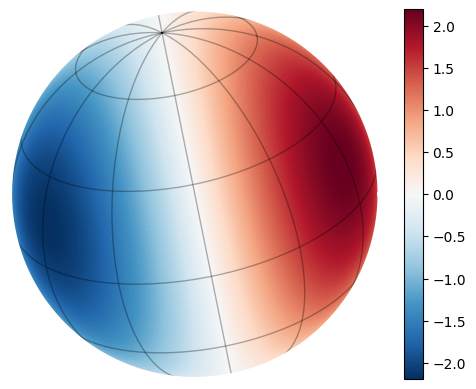

In [28]:
import matplotlib.pyplot as plt

im = show_surface(surface, rv=True, return_im=True)
_ = plt.colorbar(im)

We can then plot the rv signal received from this star as it is transited by an exoplanet

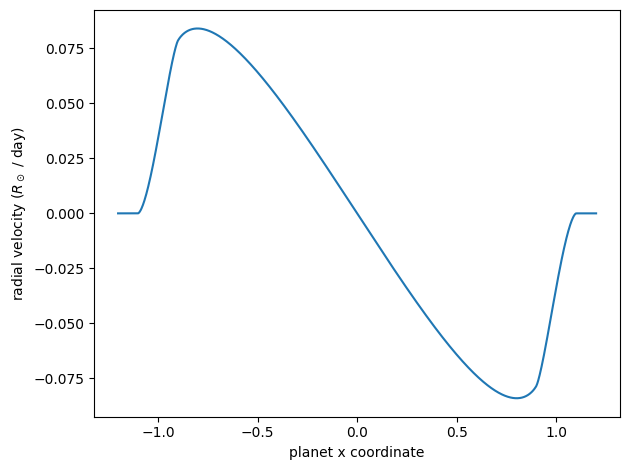

In [43]:
import jax
import numpy as np
from jaxoplanet.starry.doppler import surface_radial_velocity

x = np.linspace(-1.2, 1.2, 1000)
rv = jax.vmap(lambda x: surface_radial_velocity(surface, x=x, z=10, r=0.1))(x)

plt.plot(x, rv)
plt.xlabel("planet x coordinate")
plt.ylabel("radial velocity ($R_\odot$ / day)")
_ = plt.tight_layout()

## System radial velocity

Let's define a system and compute the integrated radial velocity of its bodies

```{important}
As jaxoplanet only features two-body keplerian orbits, the full dynamic of a multi-planetary system cannot be accounted for. Hence, this application is limited to systems made of two bodies.
```

In [62]:
from jaxoplanet.starry.orbit import Body, Central, SurfaceSystem

system = SurfaceSystem(Central(), surface).add_body(
    Body(period=20.0, radius=0.1, mass=0.1)
)

Then, we use the [radial_velocity](jaxoplanet.starry.doppler.radial_velocity) function to compute the radial velocity of the system

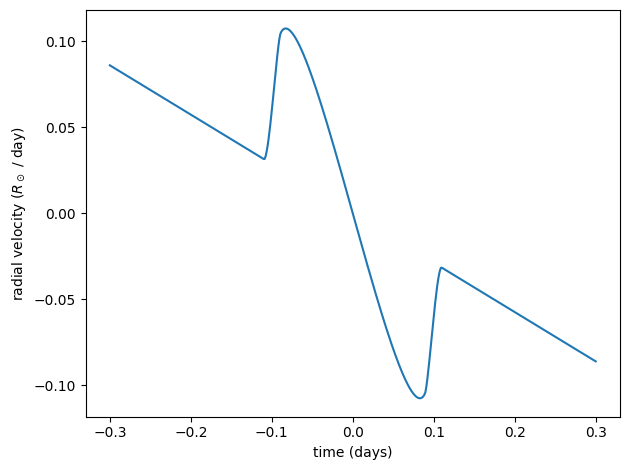

In [65]:
import numpy as np
from jaxoplanet.starry.doppler import radial_velocity

time = np.linspace(-0.3, 0.3, 500)
rv = radial_velocity(system)(time).sum(1)

plt.plot(time, rv)
plt.xlabel("time (days)")
plt.ylabel("radial velocity ($R_\odot$ / day)")
_ = plt.tight_layout()

## Accounting for surface features

We can also account for surfaces with features like spots. Let's create such a surface and compute it's radial velocity.

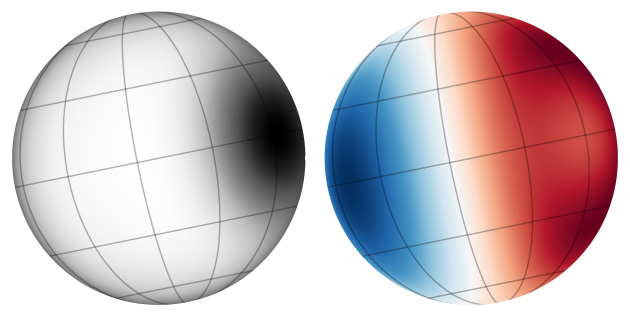

In [112]:
from jaxoplanet.starry.ylm import ylm_spot

y = ylm_spot(8)(0.8, 0.5, 0.0, 0.0)
surface = Surface(y=y, period=0.5, u=(0.2, 0.4), obl=0.2)

plt.subplot(121)
show_surface(surface, theta=0.9, cmap="Greys_r")
plt.subplot(122)
show_surface(surface, theta=0.9, rv=True)
_ = plt.tight_layout()

As before, the radial velocity can be computed with

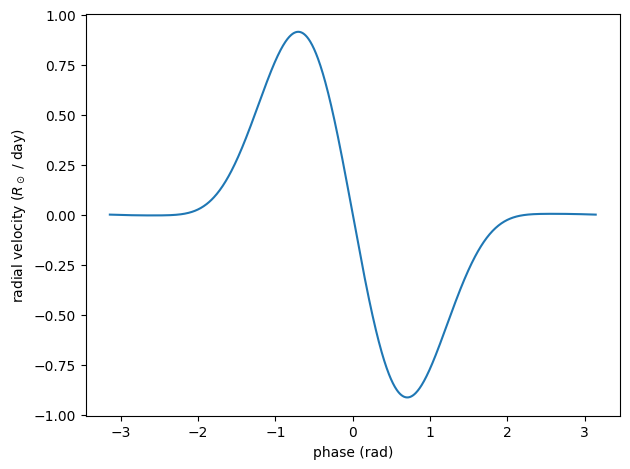

In [113]:
phase = np.linspace(-np.pi, np.pi, 1000)
rv = jax.vmap(lambda phase: surface_radial_velocity(surface, theta=phase))(phase)

plt.plot(phase, rv)
plt.xlabel("phase (rad)")
plt.ylabel("radial velocity ($R_\odot$ / day)")
_ = plt.tight_layout()